# Course::         DSC630
# Week::            3
# Assignment:: 3.2
# Title::              Using Data to improve MLB Attendance
# Date::              Dec 15, 2022

My assumption is Day of the week, Weather any kind of promotions offered would attract more people to attend the game. So I am going to explore the data and understand, On what day the attendence is more? Intention is to start more promotions to increase attendence.
what are significant factors contributing to improve attendence? Other than pormotions are there any other factors to consider?
Trying with two different approaches to solve this problem.

Approach 1 - Check the attendance count for day of the week and month and suggest day on which we could more run promotions to increase the attendence.

Approach 2 - Finding factors that impact attendance increase, correlating factors with attendance and see what are the different factors correlate and their strength and direction of correlation that impact the attendance.

In [1]:
#Import required libraries
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.preprocessing import LabelEncoder

In [2]:
# import the dodgers dataset fromm the assignment
dodgers = pd.read_csv("dodgers-2022.csv")

In [3]:
# verify the data from the imported data set: dodgers
dodgers.head()

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO


### Perform EDA - Exploratory Data Analysis

In [4]:
# statistical information about dataset.
dodgers.describe(include='all')

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
count,81,81.000000,81.000000,81,81,81.000000,81,81,81,81,81,81
unique,7,NaN,NaN,7,17,NaN,2,2,2,2,2,2
top,MAY,NaN,NaN,Tuesday,Giants,NaN,Clear,Night,NO,NO,NO,NO
freq,18,NaN,NaN,13,9,NaN,62,66,79,78,67,70
mean,NaN,16.135802,41040.074074,NaN,NaN,73.148148,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,9.605666,8297.539460,NaN,NaN,8.317318,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1.000000,24312.000000,NaN,NaN,54.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,8.000000,34493.000000,NaN,NaN,67.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,15.000000,40284.000000,NaN,NaN,73.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,25.000000,46588.000000,NaN,NaN,79.000000,NaN,NaN,NaN,NaN,NaN,NaN


Observation: Based on above summary 
1 Average attendance is about '41K'(41040.07)
2 Maximum attendance is '56K'(56000). 
3 Also, 'Tuesday' seems to be the day on top and month is 'May'.

In [7]:
# Installing missingno package
pip install missingno

  Using cached missingno-0.5.1-py3-none-any.whl (8.7 kB)
Note: you may need to restart the kernel to use updated packages.


<AxesSubplot:>

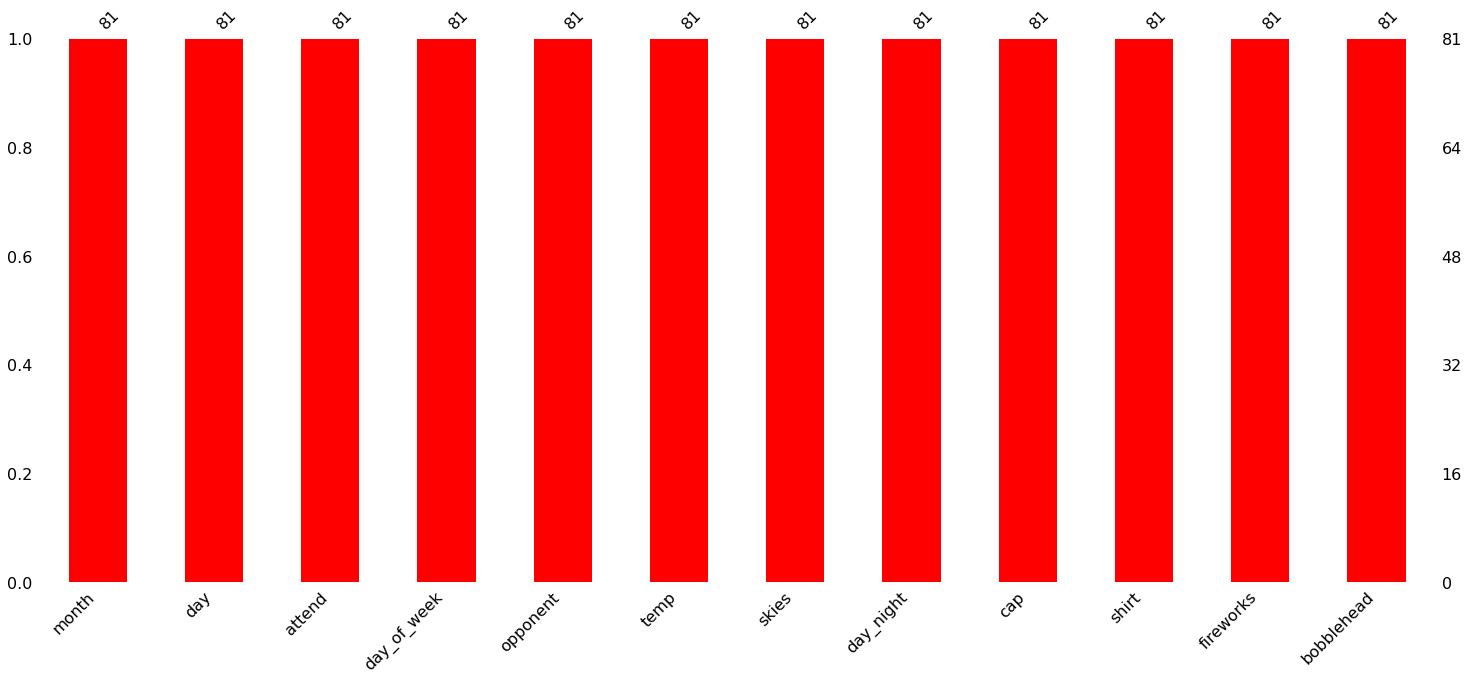

In [8]:
# Check for missing values in the data using missingno package
import missingno as msno
msno.bar(dodgers, color='r')

Observation: Based on above graph and check, there seems to be no missing values in the given data.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


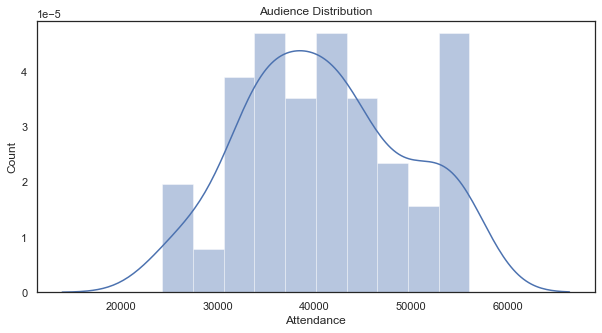

In [9]:
# Check audience distribution on attendance from the data set, the column name is 'attend'
# x axis as Attendance and Y axis as count.
sns.set(style='white')
plt.figure(figsize=(10,5))
sns.distplot(a=dodgers['attend'],color='b', bins=10)
plt.title("Audience Distribution")
plt.xlabel('Attendance')
plt.ylabel('Count');

Observation: The distribution seems normal with average attendance being approxamtely 40000 per game with no real outliers.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


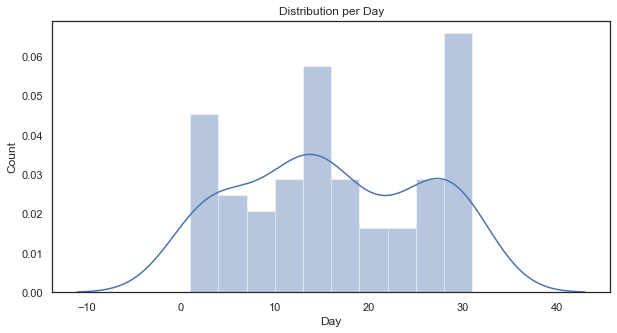

In [10]:
# Check distribution per day, column 'day'
# x axis as Day and Y axis as Count
sns.set(style='white')
plt.figure(figsize=(10,5))
sns.distplot(a=dodgers['day'],color='b', bins=10)
plt.title("Distribution per Day")
plt.xlabel('Day')
plt.ylabel('Count');

Observation: The distribution seems uniform with Day 30, 15 and 1 being the days where games happen most.

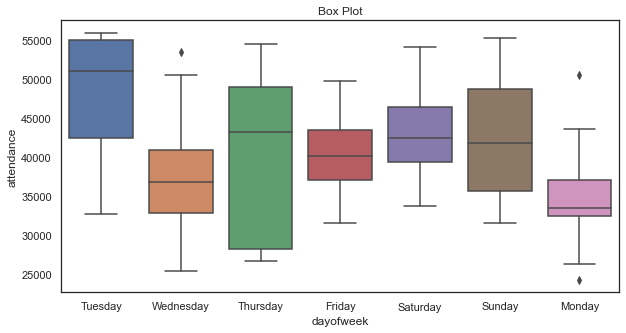

In [11]:
# Check attendance per day of the week, using box plot 
# with x axis as day of week and y axis as attend 
sns.set(style='white')
plt.figure(figsize=(10,5))
sns.boxplot(data=dodgers, x='day_of_week',y='attend')
plt.title("Box Plot")
plt.xlabel('dayofweek')
plt.ylabel('attendance');

Observation: 'Tuesday' is clearly the best day of the week in terms of overall attendance at 55000 and 'Monday' is the least.

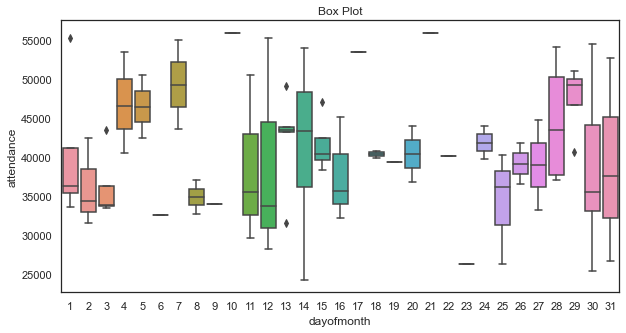

In [12]:
# Check attendance per day of the month
# with x axis as day of month and y axis as attend
sns.set(style='white')
plt.figure(figsize=(10,5))
sns.boxplot(data=dodgers, x='day',y='attend')
plt.title("Box Plot")
plt.xlabel('dayofmonth')
plt.ylabel('attendance');

Observation: Day '7' of the month is the best month with highest attendance. Also, minimum attendance on this day is higher than most of the median attendance on other days.

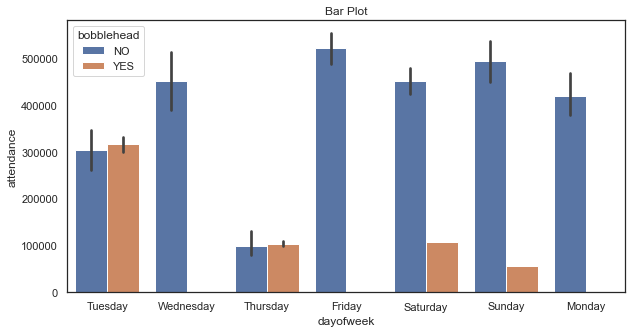

In [13]:
# Check day of week distribution to see attendance considering bobblehead

sns.set(style='white')
plt.figure(figsize=(10,5))

sns.barplot(data=dodgers, x='day_of_week',y='attend', hue='bobblehead',estimator=sum)
plt.title("Bar Plot")
plt.xlabel('dayofweek')
plt.ylabel('attendance');

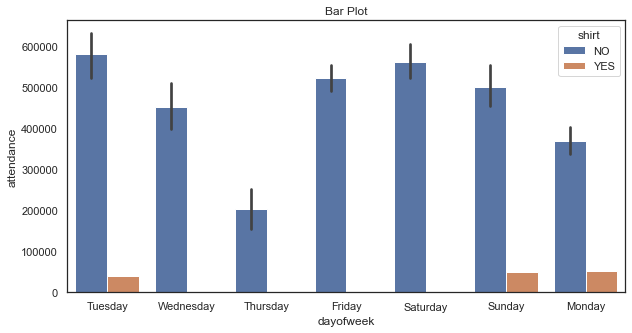

In [14]:
# Check day of week distribution to see attendance considering shirt

sns.set(style='white')
plt.figure(figsize=(10,5))

sns.barplot(data=dodgers, x='day_of_week',y='attend', hue='shirt',estimator=sum)
plt.title("Bar Plot")
plt.xlabel('dayofweek')
plt.ylabel('attendance');

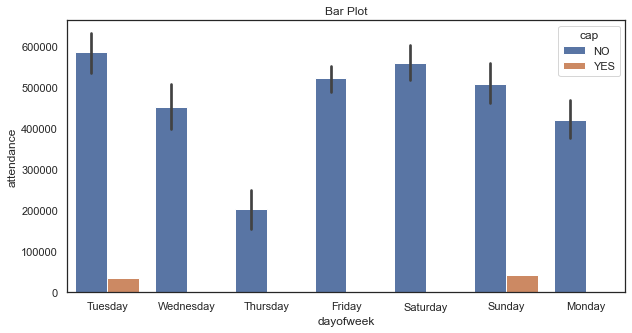

In [15]:
# Check day of week distribution to see attendance considering cap

sns.set(style='white')
plt.figure(figsize=(10,5))

sns.barplot(data=dodgers, x='day_of_week',y='attend', hue='cap',estimator=sum)
plt.title("Bar Plot")
plt.xlabel('dayofweek')
plt.ylabel('attendance');

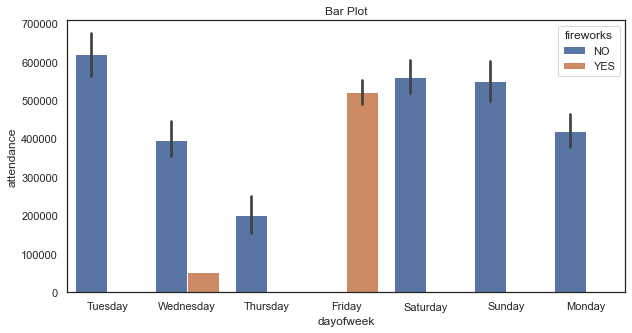

In [16]:
# Check day of week distribution to see attendance considering fireworks

sns.set(style='white')
plt.figure(figsize=(10,5))

sns.barplot(data=dodgers, x='day_of_week',y='attend', hue='fireworks',estimator=sum)
plt.title("Bar Plot")
plt.xlabel('dayofweek')
plt.ylabel('attendance');

Observation: Based on above 4 plots, we observe that the attendance especially on Tuesdays is high when 'Bobblehead' are being sold/promoted compared to others (cap, shirt, fireworks).

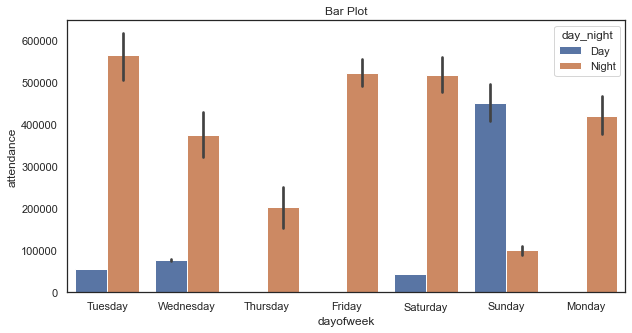

In [17]:
# Check day of week distribution to see attendance considering day or night game

sns.set(style='white')
plt.figure(figsize=(10,5))

sns.barplot(data=dodgers, x='day_of_week',y='attend', hue='day_night',estimator=sum)
plt.title("Bar Plot")
plt.xlabel('dayofweek')
plt.ylabel('attendance');

Observation: The attendance is cleary high on night games compared to day games and that's clearly higher on Tuesdays with highest attendance followed by Friday and Saturday closely.

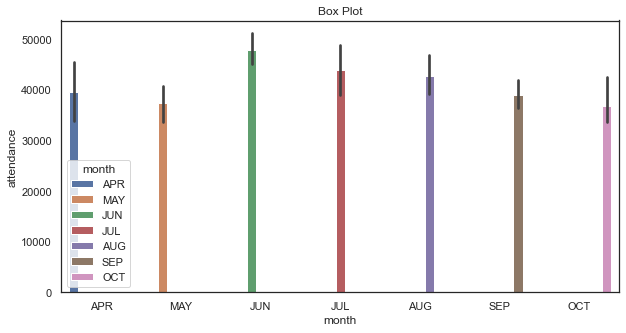

In [18]:
# Check attendance per month with month nameon x axis and count on y axis.
sns.set(style='white')
plt.figure(figsize=(10,5))
sns.barplot(data=dodgers, x='month',y='attend', hue='month', estimator=np.mean)
plt.title("Box Plot")
plt.xlabel('month')
plt.ylabel('attendance');

Observation: Based on above chart, it seems like in Summer months - June, July and August is pretty good with high mean attendance and ideal conditions for game closely followed by April and September.

### Finding Correlations

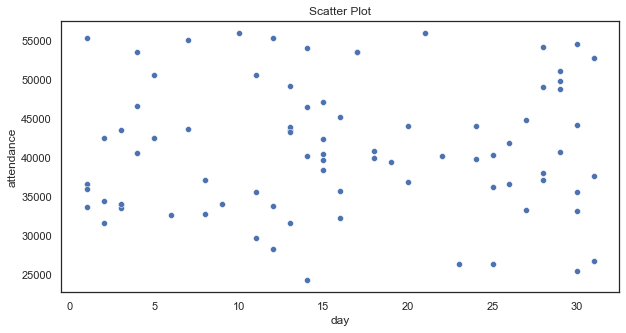

In [19]:
# scatter plot to see correlation. Day of month vs Attendance
# x-axis : Day of the month, Y-axis attendance 
sns.set(style='white')
plt.figure(figsize=(10,5))

sns.scatterplot(data=dodgers, y='attend',x='day')
plt.title("Scatter Plot")
plt.ylabel('attendance')
plt.xlabel('day');

Observation: There is not much strong correlation but the attendance seems higher at mid and end of the month compared to the beginning of the month.

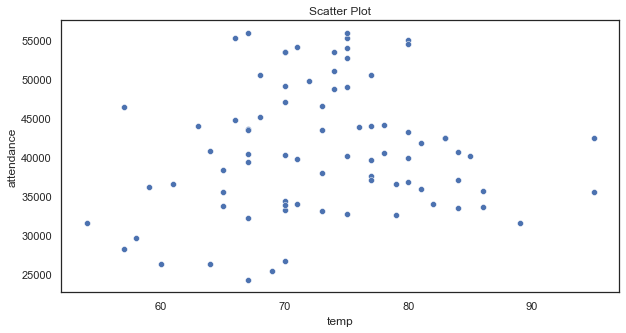

In [20]:
# scatter plot to see correlation. Temperature vs Attendance
# X axis: Temperature, Y axis : attendance
sns.set(style='white')
plt.figure(figsize=(10,5))

sns.scatterplot(data=dodgers, y='attend',x='temp')
plt.title("Scatter Plot")
plt.ylabel('attendance')
plt.xlabel('temp');

Observation: Attendance seems to be high with tempreatures at 70F and 80F. However, with higher temperatures > 80F, attendance seems to decrease, simillary low attendance with the  temperature at lessthan 70F

### Calculate Correlation Coefficient

In [21]:
# Create new variable by combining day of the week and month as well as bobblehead and fireworks 
# to find any specific observations
# 1. day_of_week_month and 2. bobblehead_fireworks
dodgers['day_of_week_month'] = dodgers['month']+'-'+dodgers['day_of_week']
dodgers['bobblehead_fireworks'] = dodgers['bobblehead']+'-'+dodgers['fireworks']
dodgers.head()

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead,day_of_week_month,bobblehead_fireworks
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO,APR-Tuesday,NO-NO
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO,APR-Wednesday,NO-NO
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO,APR-Thursday,NO-NO
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO,APR-Friday,NO-YES
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO,APR-Saturday,NO-NO


In [22]:
# Encode the categorical features to generate heat map

from sklearn.preprocessing import StandardScaler, OrdinalEncoder
enc = OrdinalEncoder()
sc = StandardScaler()
cat_cols = ['month', 'day_of_week', 'opponent', 'skies',
       'day_night', 'cap', 'shirt', 'fireworks', 'bobblehead','day_of_week_month','bobblehead_fireworks']

for col in cat_cols:
    dodgers[col] = enc.fit_transform(dodgers[[col]])

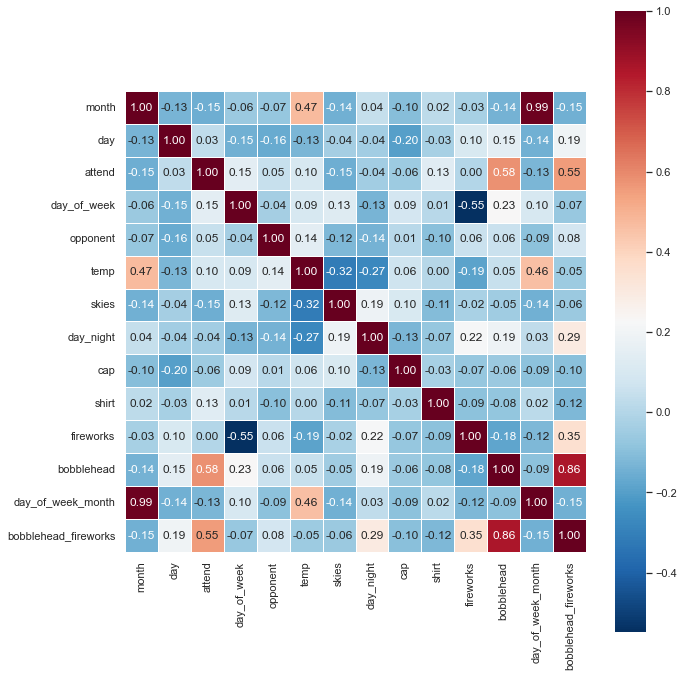

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(dodgers._get_numeric_data().astype(float).corr(),
            square=True, cmap='RdBu_r', linewidths=.5,
            annot=True, fmt='.2f').figure.tight_layout()
plt.show()

Observation: Based on above correlation/heat map, 1.The correlation is strong (0.58) between attendance and bobblehead. followed by sale/promotion. 2.Second highest correlation (0.45) between attendance and bobblehead+fireworks combo. 3.There is also a good correlation (0.47) between temp and month which is also evident from earlier plots and observations.

In [24]:
# Calculate correlation coef. of attendance feature

dodgers.corr(method='pearson').iloc[2].sort_values(ascending=False)

attend                  1.000000
bobblehead              0.581895
bobblehead_fireworks    0.554772
day_of_week             0.147216
shirt                   0.133269
temp                    0.098951
opponent                0.045021
day                     0.027093
fireworks               0.002094
day_night              -0.043544
cap                    -0.055002
day_of_week_month      -0.128691
skies                  -0.150963
month                  -0.152777
Name: attend, dtype: float64

Observation: The correlation coeff is clearly high for bobblehead and the next one being the bobblehead+fireworks combo. Also, day_of_week has good positive coeff with Tuesday being the day with highest attendance which is also evident from earlier plots/observations.

### Fit into the model

In [25]:
# Split data into independent features and dependent feature (attend)

X = dodgers[['month', 'day', 'day_of_week', 'opponent', 'temp', 'skies',
       'day_night', 'cap', 'shirt', 'fireworks', 'bobblehead','day_of_week_month','bobblehead_fireworks']]
y = dodgers['attend']

In [26]:
feature_variables = ['month', 'day', 'day_of_week', 'opponent', 'temp', 'skies',
       'day_night', 'cap', 'shirt', 'fireworks', 'bobblehead','day_of_week_month','bobblehead_fireworks']

In [27]:
# Transform the data to standard scaler
X = sc.fit_transform(X)
y = sc.fit_transform(y.values.reshape(-1,1))

In [28]:
X_features = pd.DataFrame(X,columns=feature_variables)  

In [29]:
# Using statsmodel to run regression model
import statsmodels.api as sm 
model = sm.OLS(y, sm.add_constant(X_features)).fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [30]:
# Print the model results
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     4.724
Date:                Sun, 18 Dec 2022   Prob (F-statistic):           1.49e-05
Time:                        17:46:41   Log-Likelihood:                -90.377
No. Observations:                  81   AIC:                             206.8
Df Residuals:                      68   BIC:                             237.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.457e-16      0.090   1.63e-15      1.000      -0.179       0.179
month                    0.6911      1.591      0.434      0.665      -2.485       3.867
day                     -0.1015      0.099     -1.030      0.307      -0.298       0.095
day_of_week              0.2089      0.266      0.786      0.435      -0.321       0.739
opponent                -0.0598      0.097     -0.620      0.537      -0.252       0.133
temp                     0.0574      0.136      0.423      0.674      -0.214       0.329
skies                   -0.0951      0.112     -0.849      0.399      -0.319       0.128
day_night               -0.1682      0.105     -1.606      0.113      -0.377       0.041
cap                     -0.0479      0.095     -0.504      0.616      -0.238       0.142
shirt                    0.1655      0.094      1.760      0.083      -0.022       0.353
fireworks                0.0508      0.099      0.512      0.610      -0.147       0.249
bobblehead               0.3282      0.064      5.146      0.000       0.201       0.455
day_of_week_month       -0.8062      1.567     -0.514      0.609      -3.934       2.322
bobblehead_fireworks     0.3390      0.055      6.168      0.000       0.229       0.449
==============================================================================
Omnibus:                        1.977   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.372   Jarque-Bera (JB):                1.955
Skew:                           0.360   Prob(JB):                        0.376
Kurtosis:                       2.753   Cond. No.                     9.22e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.51e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Observation: Based on above results, the R-squared value is 0.46 indicating that the features considered account for  46% variation in attendance and there are still other factors which might influence/improve the attendance.
The variables/features such as month, day_of_week, temp, shirt, fireworks, bobblehead and bobblehead+fireworks combo all have positive coeff indicating that these are factors that can influence the overall attendance.
Considering p-value, bobblehead and bobblehead+fireworks has value < 0.05 indicating that these features have significant contribution to this model.

### Conclusion

Overall, it is safe to say that based on the Dodgers game data, the attendance is higher on Tuesdays and mean attendance is higher in summer months - June, July and August where temperatures are warmer and ideal for games. The regression model results also support the same analysis along with the sales/promotions of bobblehead, fireworks and shirts.
Finally, to improve MLB attendance, more games can be set on Tuesdays when temperatures are warmer in Summer and running sales/promotions around bobblehead, fireworks, shirt etc.